In [90]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
import numpy as np
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'

In [129]:
df = pd.read_csv('result_final.csv', encoding='utf-8')
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])
df['proband'] = df['proband'].apply(lambda x: x.capitalize())
df_witek = df[df['proband']=='Witek']

In [130]:
df.head(3)

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20


In [131]:
df_witek.head(3)

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
600,600,nature_3_r.jpeg,5,8.336228,Witek,True,nature_3,nature,original
601,601,portrait_9_4.jpeg,1,3.467105,Witek,False,portrait_9,portrait,4
602,602,art_6_20.jpeg,2,8.133460,Witek,False,art_6,art,20


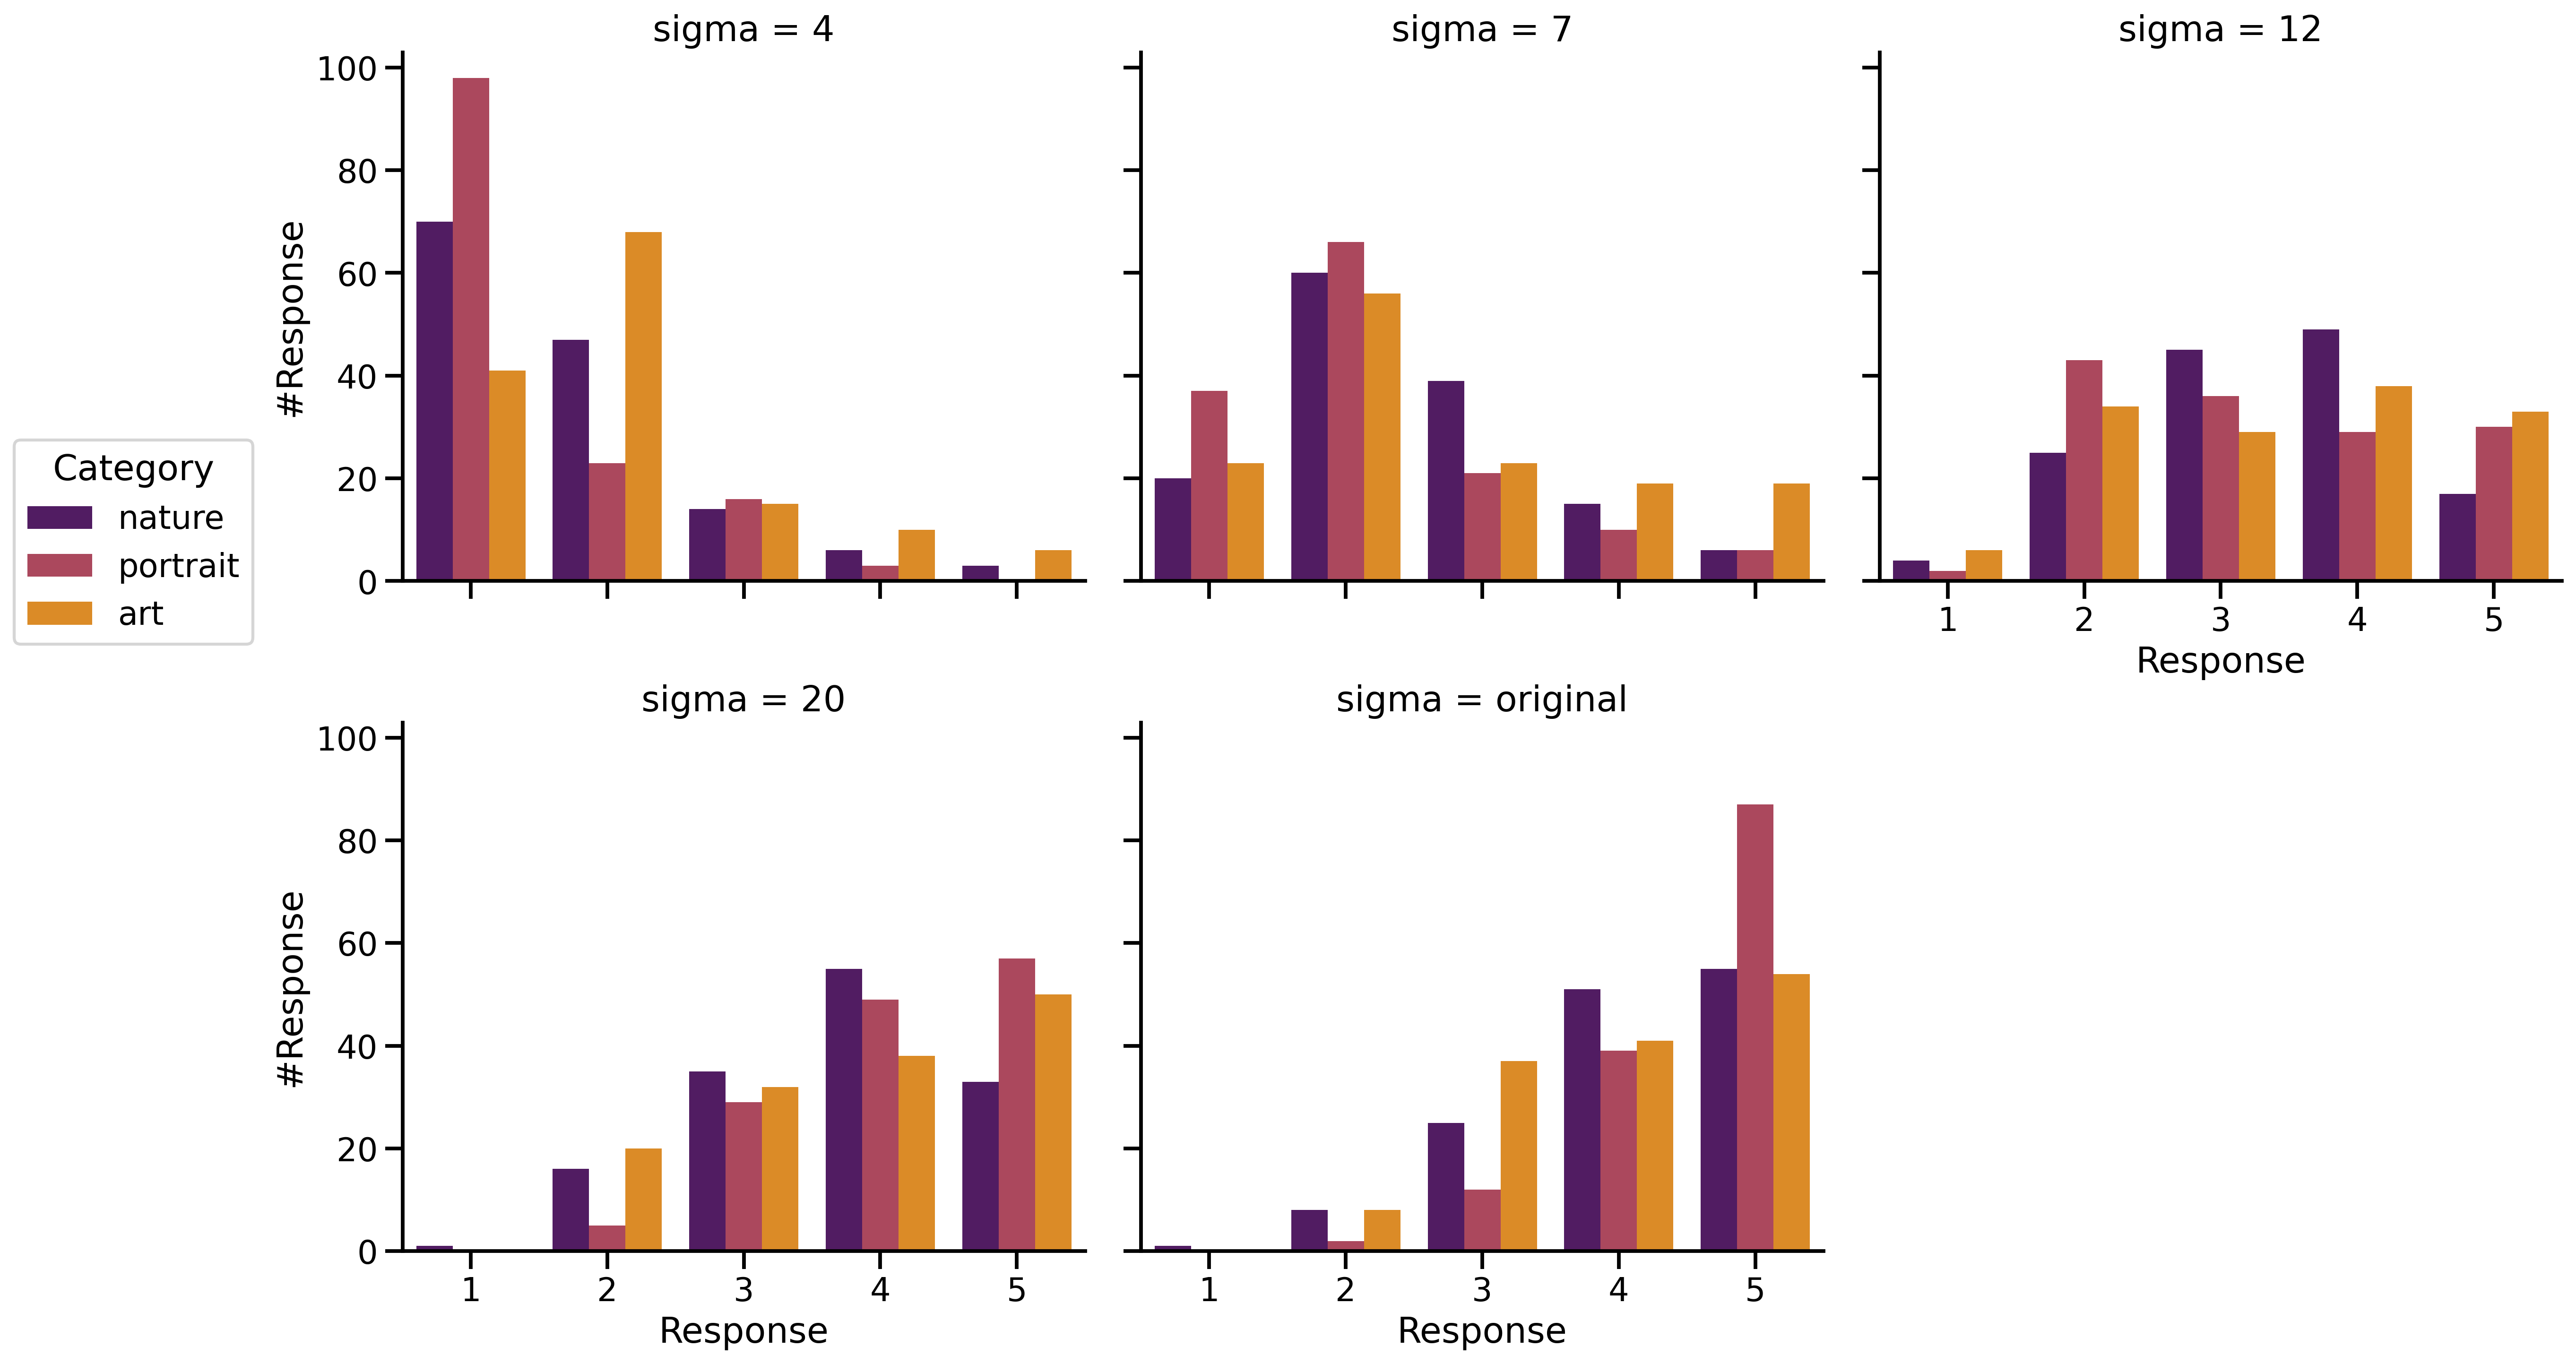

In [125]:
# catplot für alle probanden
g = sns.catplot(x='response', data=df, hue='category', kind='count',
                palette='inferno', col='sigma', col_wrap=3)
g.set(xlabel='Response', ylabel='#Response')
plt.tight_layout()
g.fig.set_dpi(300)
sns.move_legend(g, "center left", bbox_to_anchor=(-0.1, 0.6), ncol=1, title='Category', frameon=True)

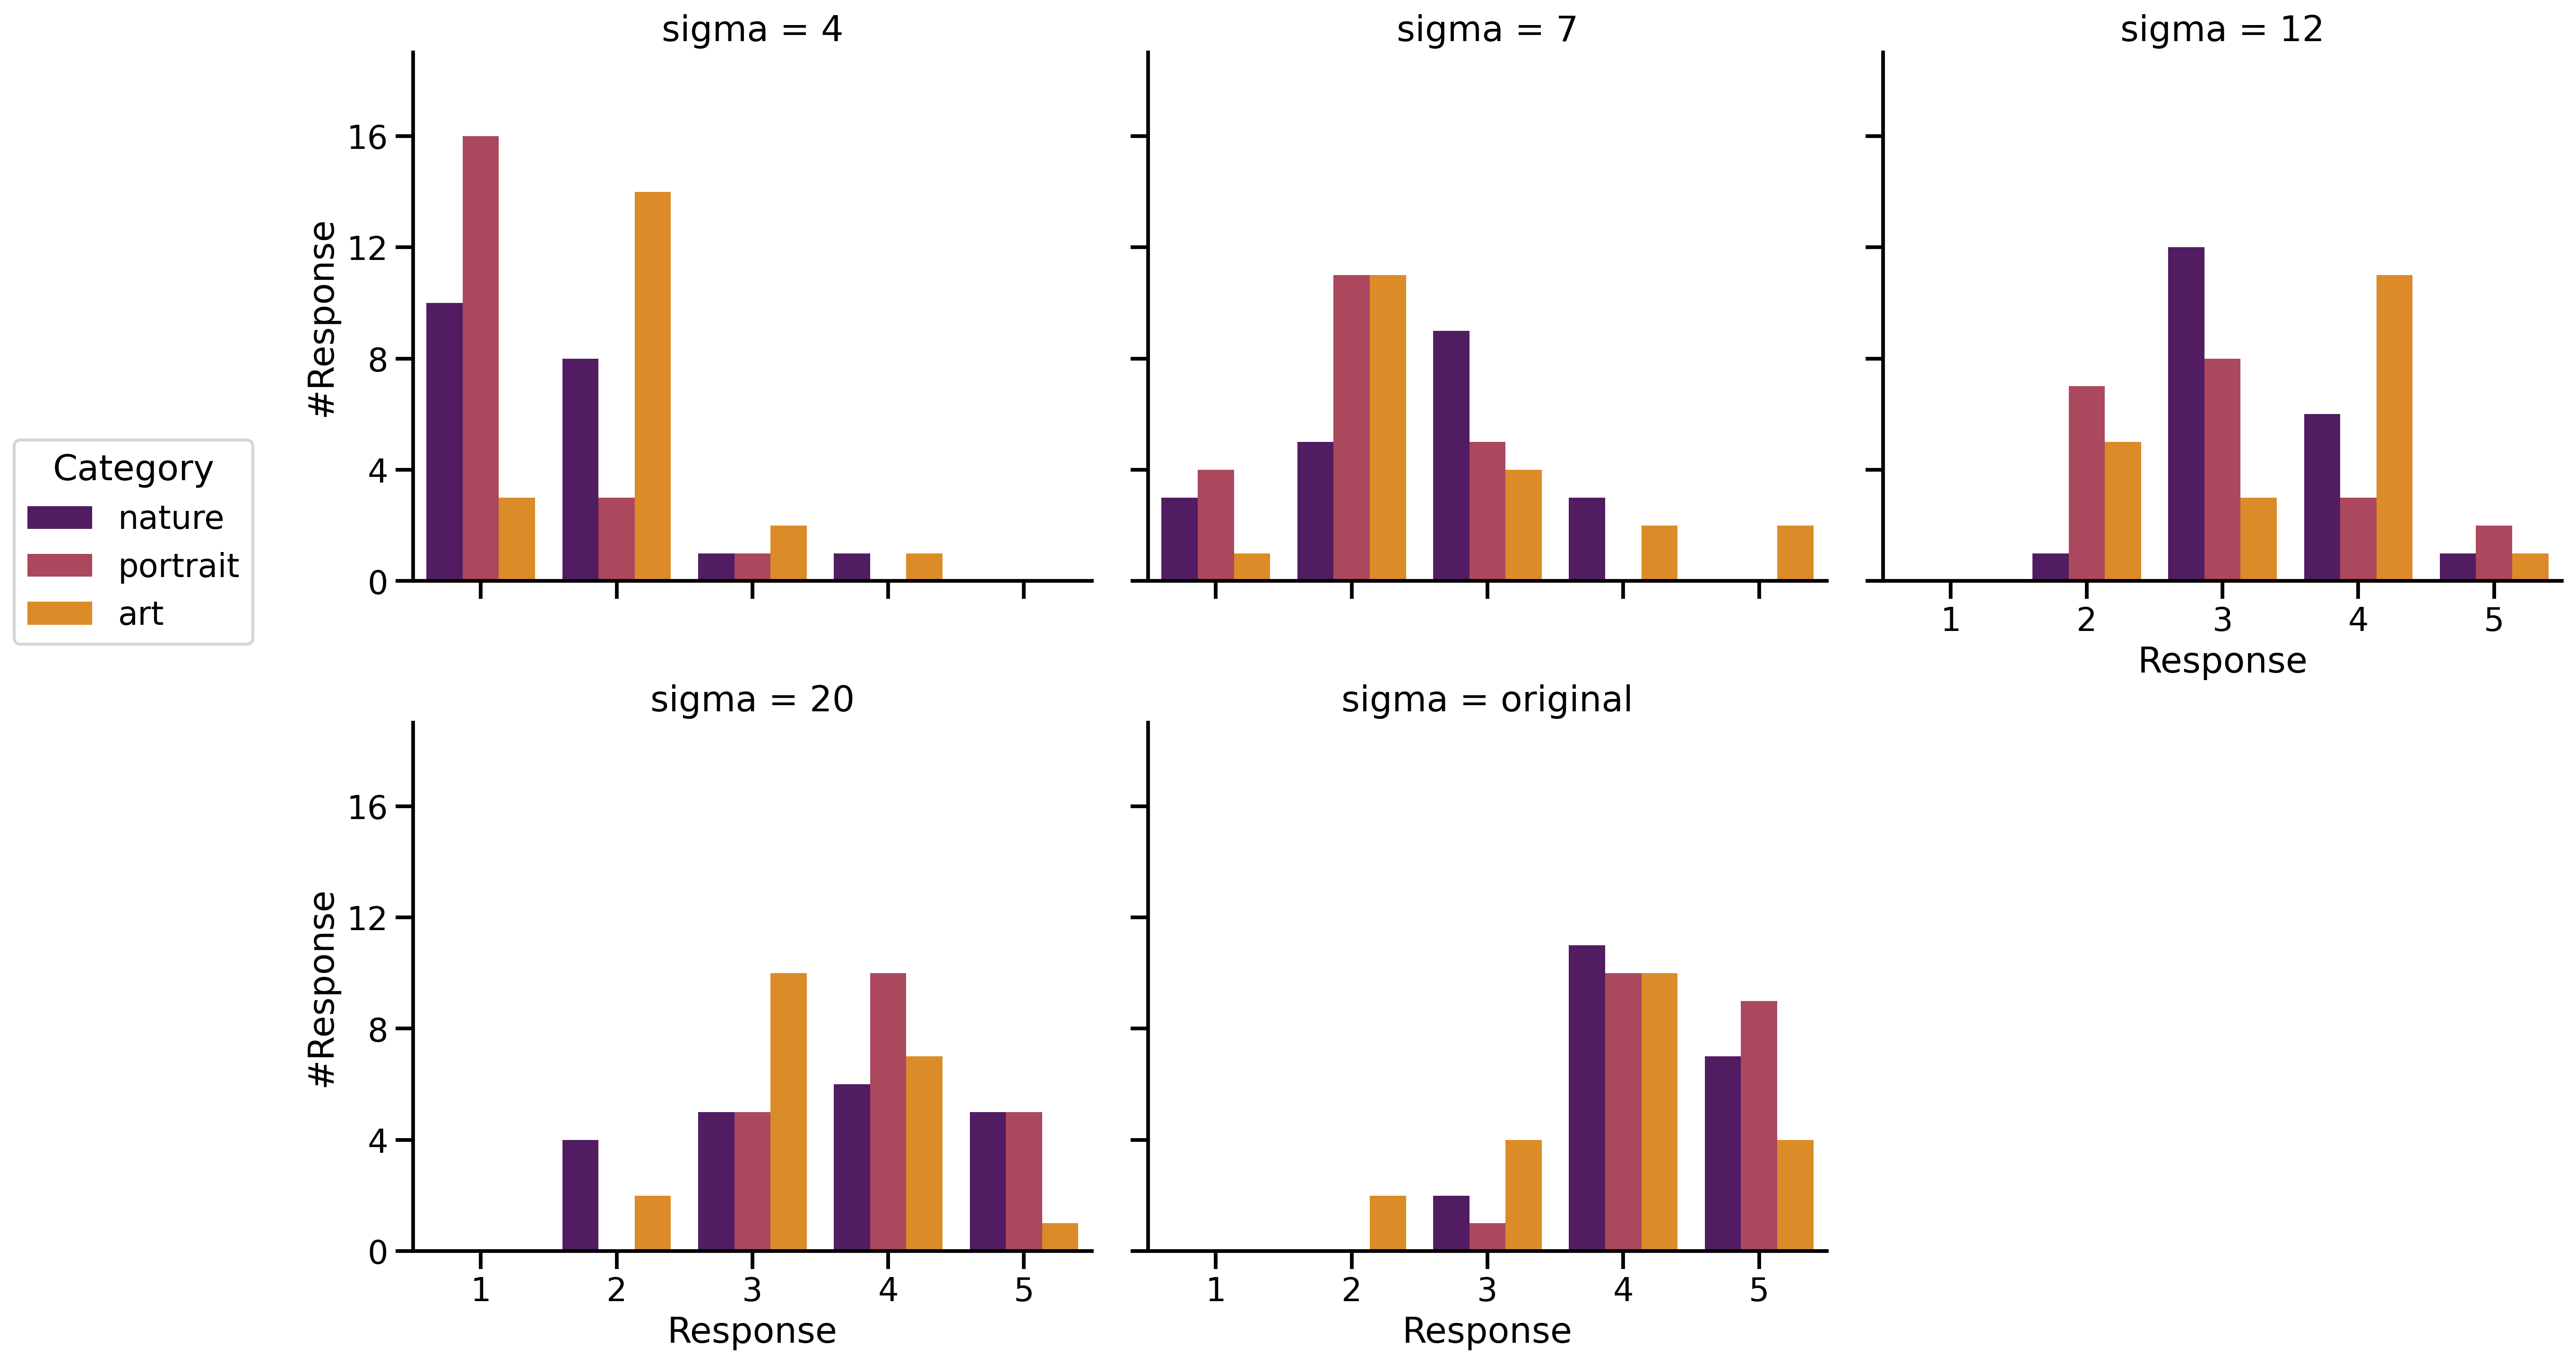

In [97]:
# catplot für witek
g = sns.catplot(x='response', data=df_witek, hue='category', kind='count',
                palette='inferno', col='sigma', col_wrap=3)
g.set(xlabel='Response', ylabel='#Response')
plt.tight_layout()
g.fig.set_dpi(300)
g.set(ylim =(0, 19))
g.set(yticks=np.arange(0,20,4))
sns.move_legend(g, "center left", bbox_to_anchor=(-0.1, 0.6), ncol=1, title='Category', frameon=True)

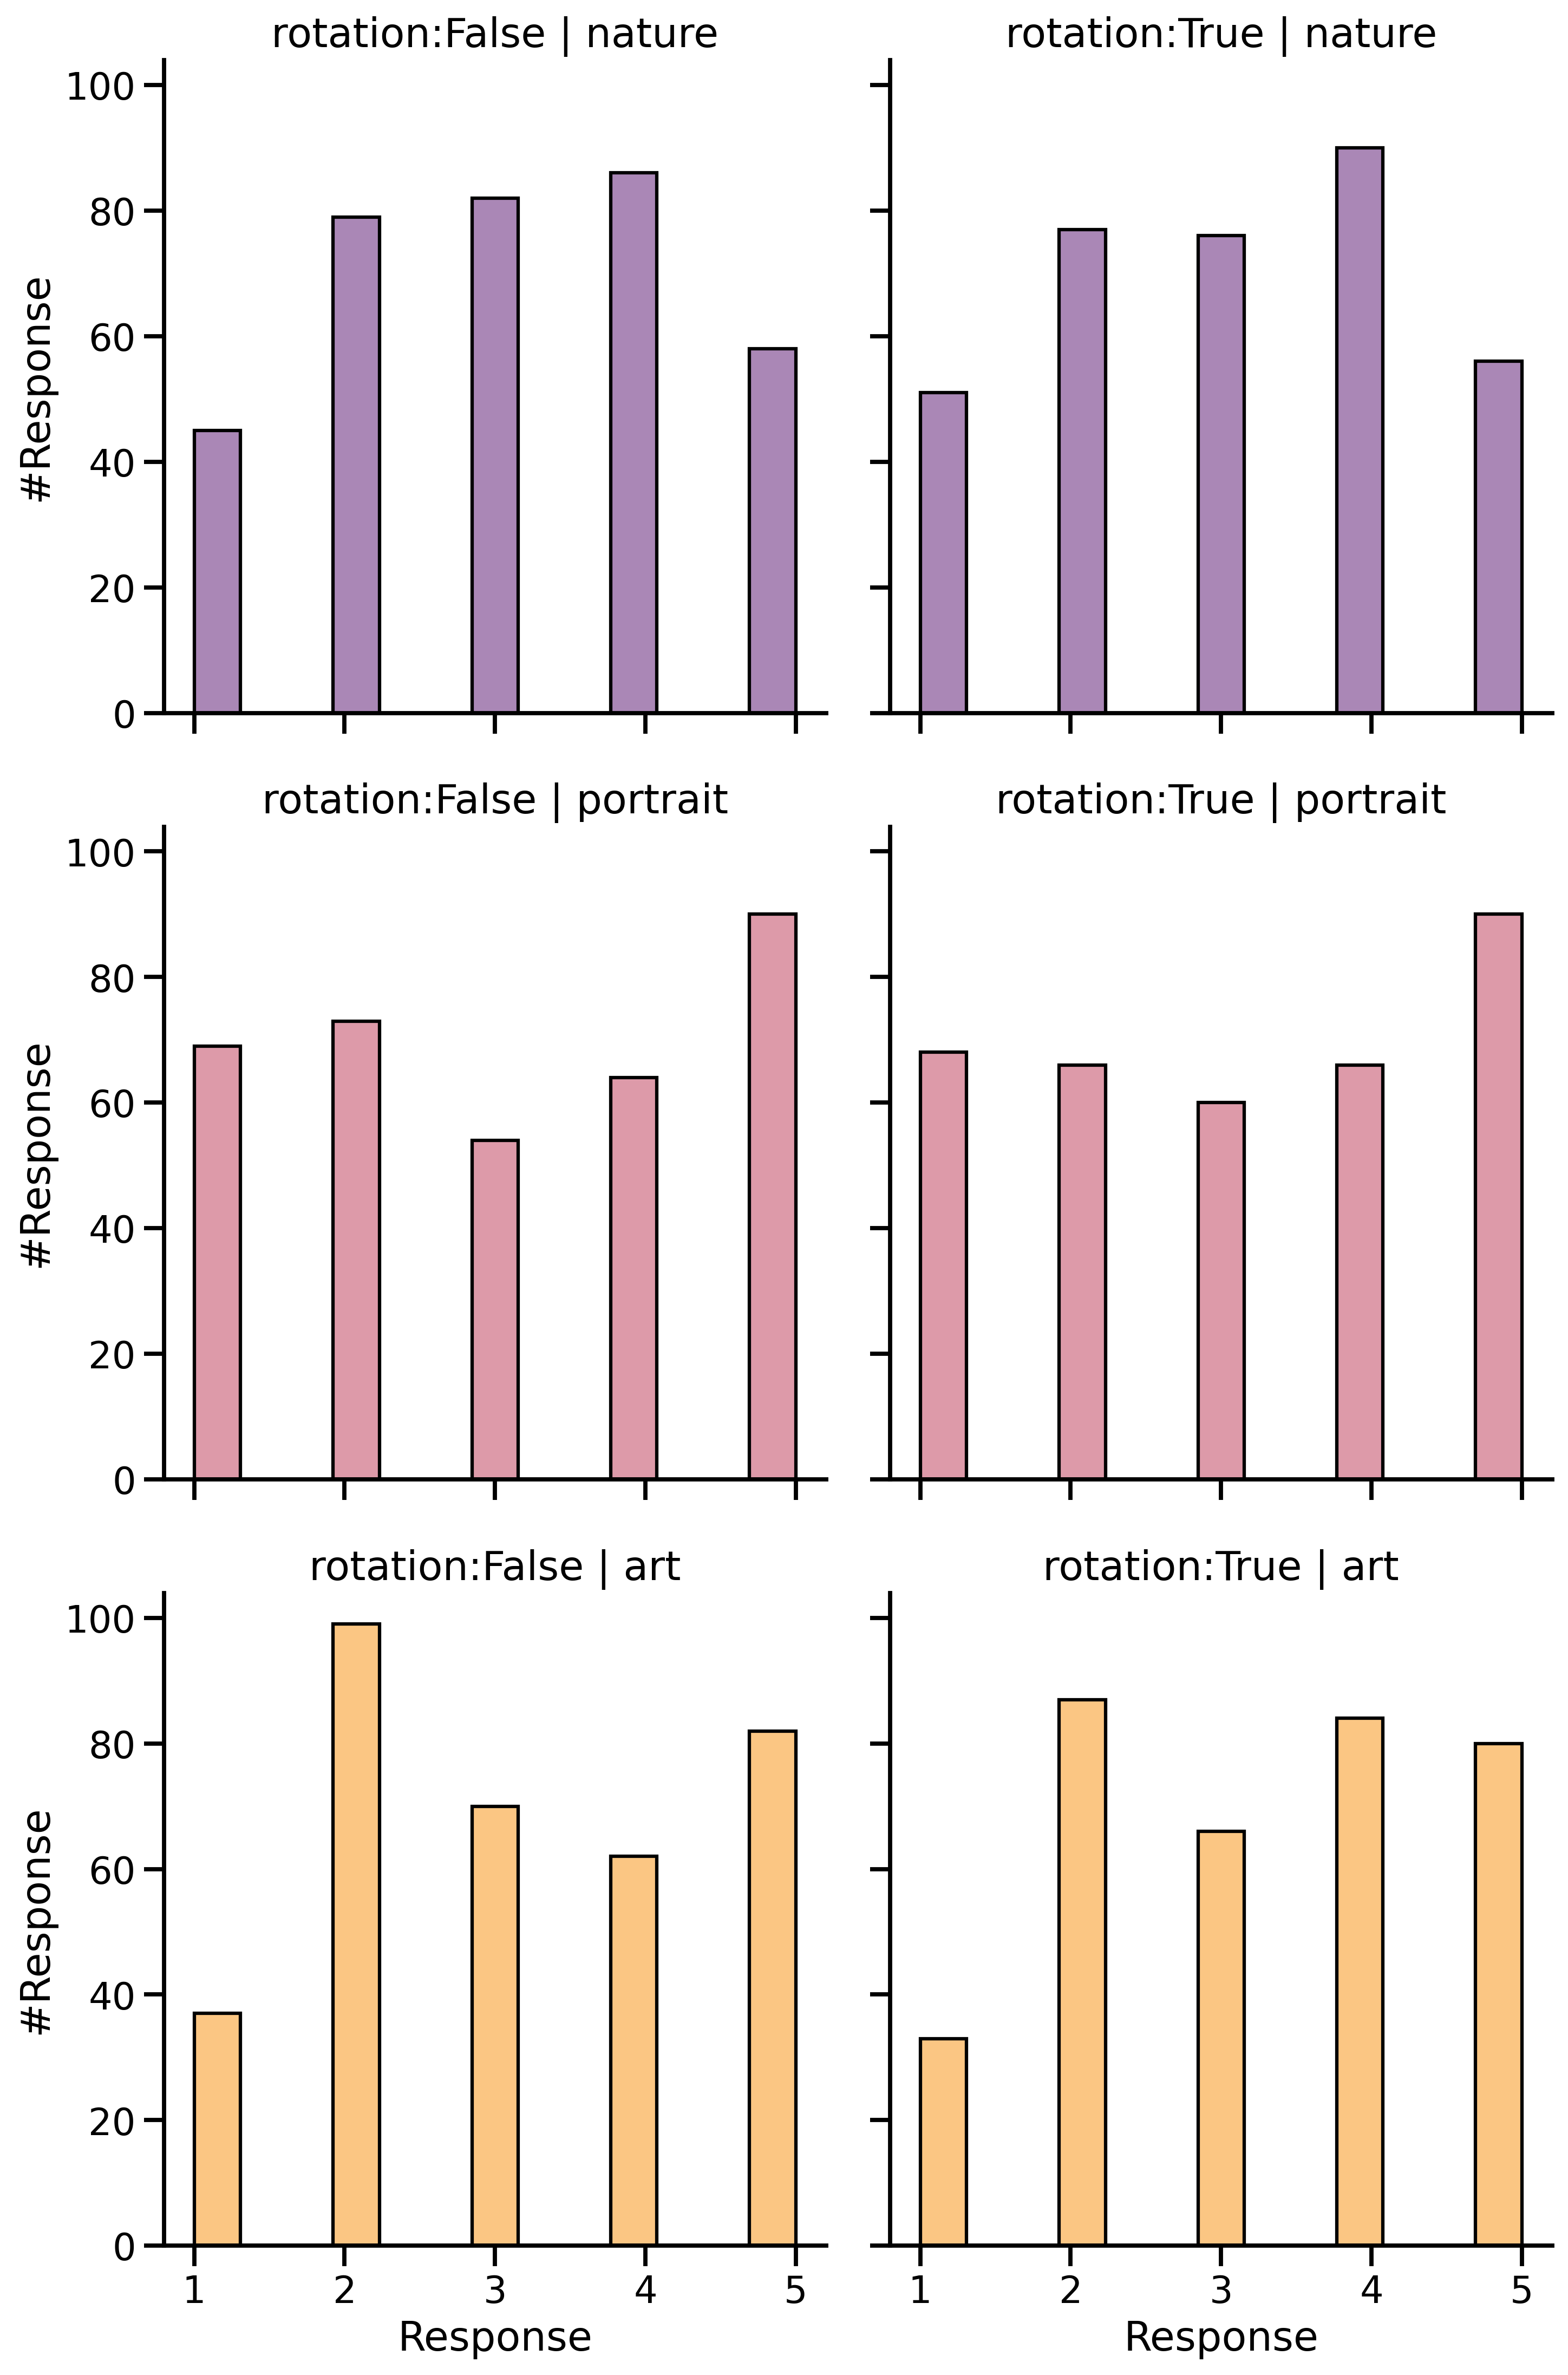

In [122]:
#distplot by category and rotation, alle probanden
g = sns.displot(x='response', data=df, kind='hist', palette='inferno', col='rotation',
                hue="category", row='category', legend=False)
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
g.fig.set_dpi(300)
g.set_titles('rotation:{col_name} | {row_name}')
g.set_ylabels('#Response')
g.set_xlabels('Response')  

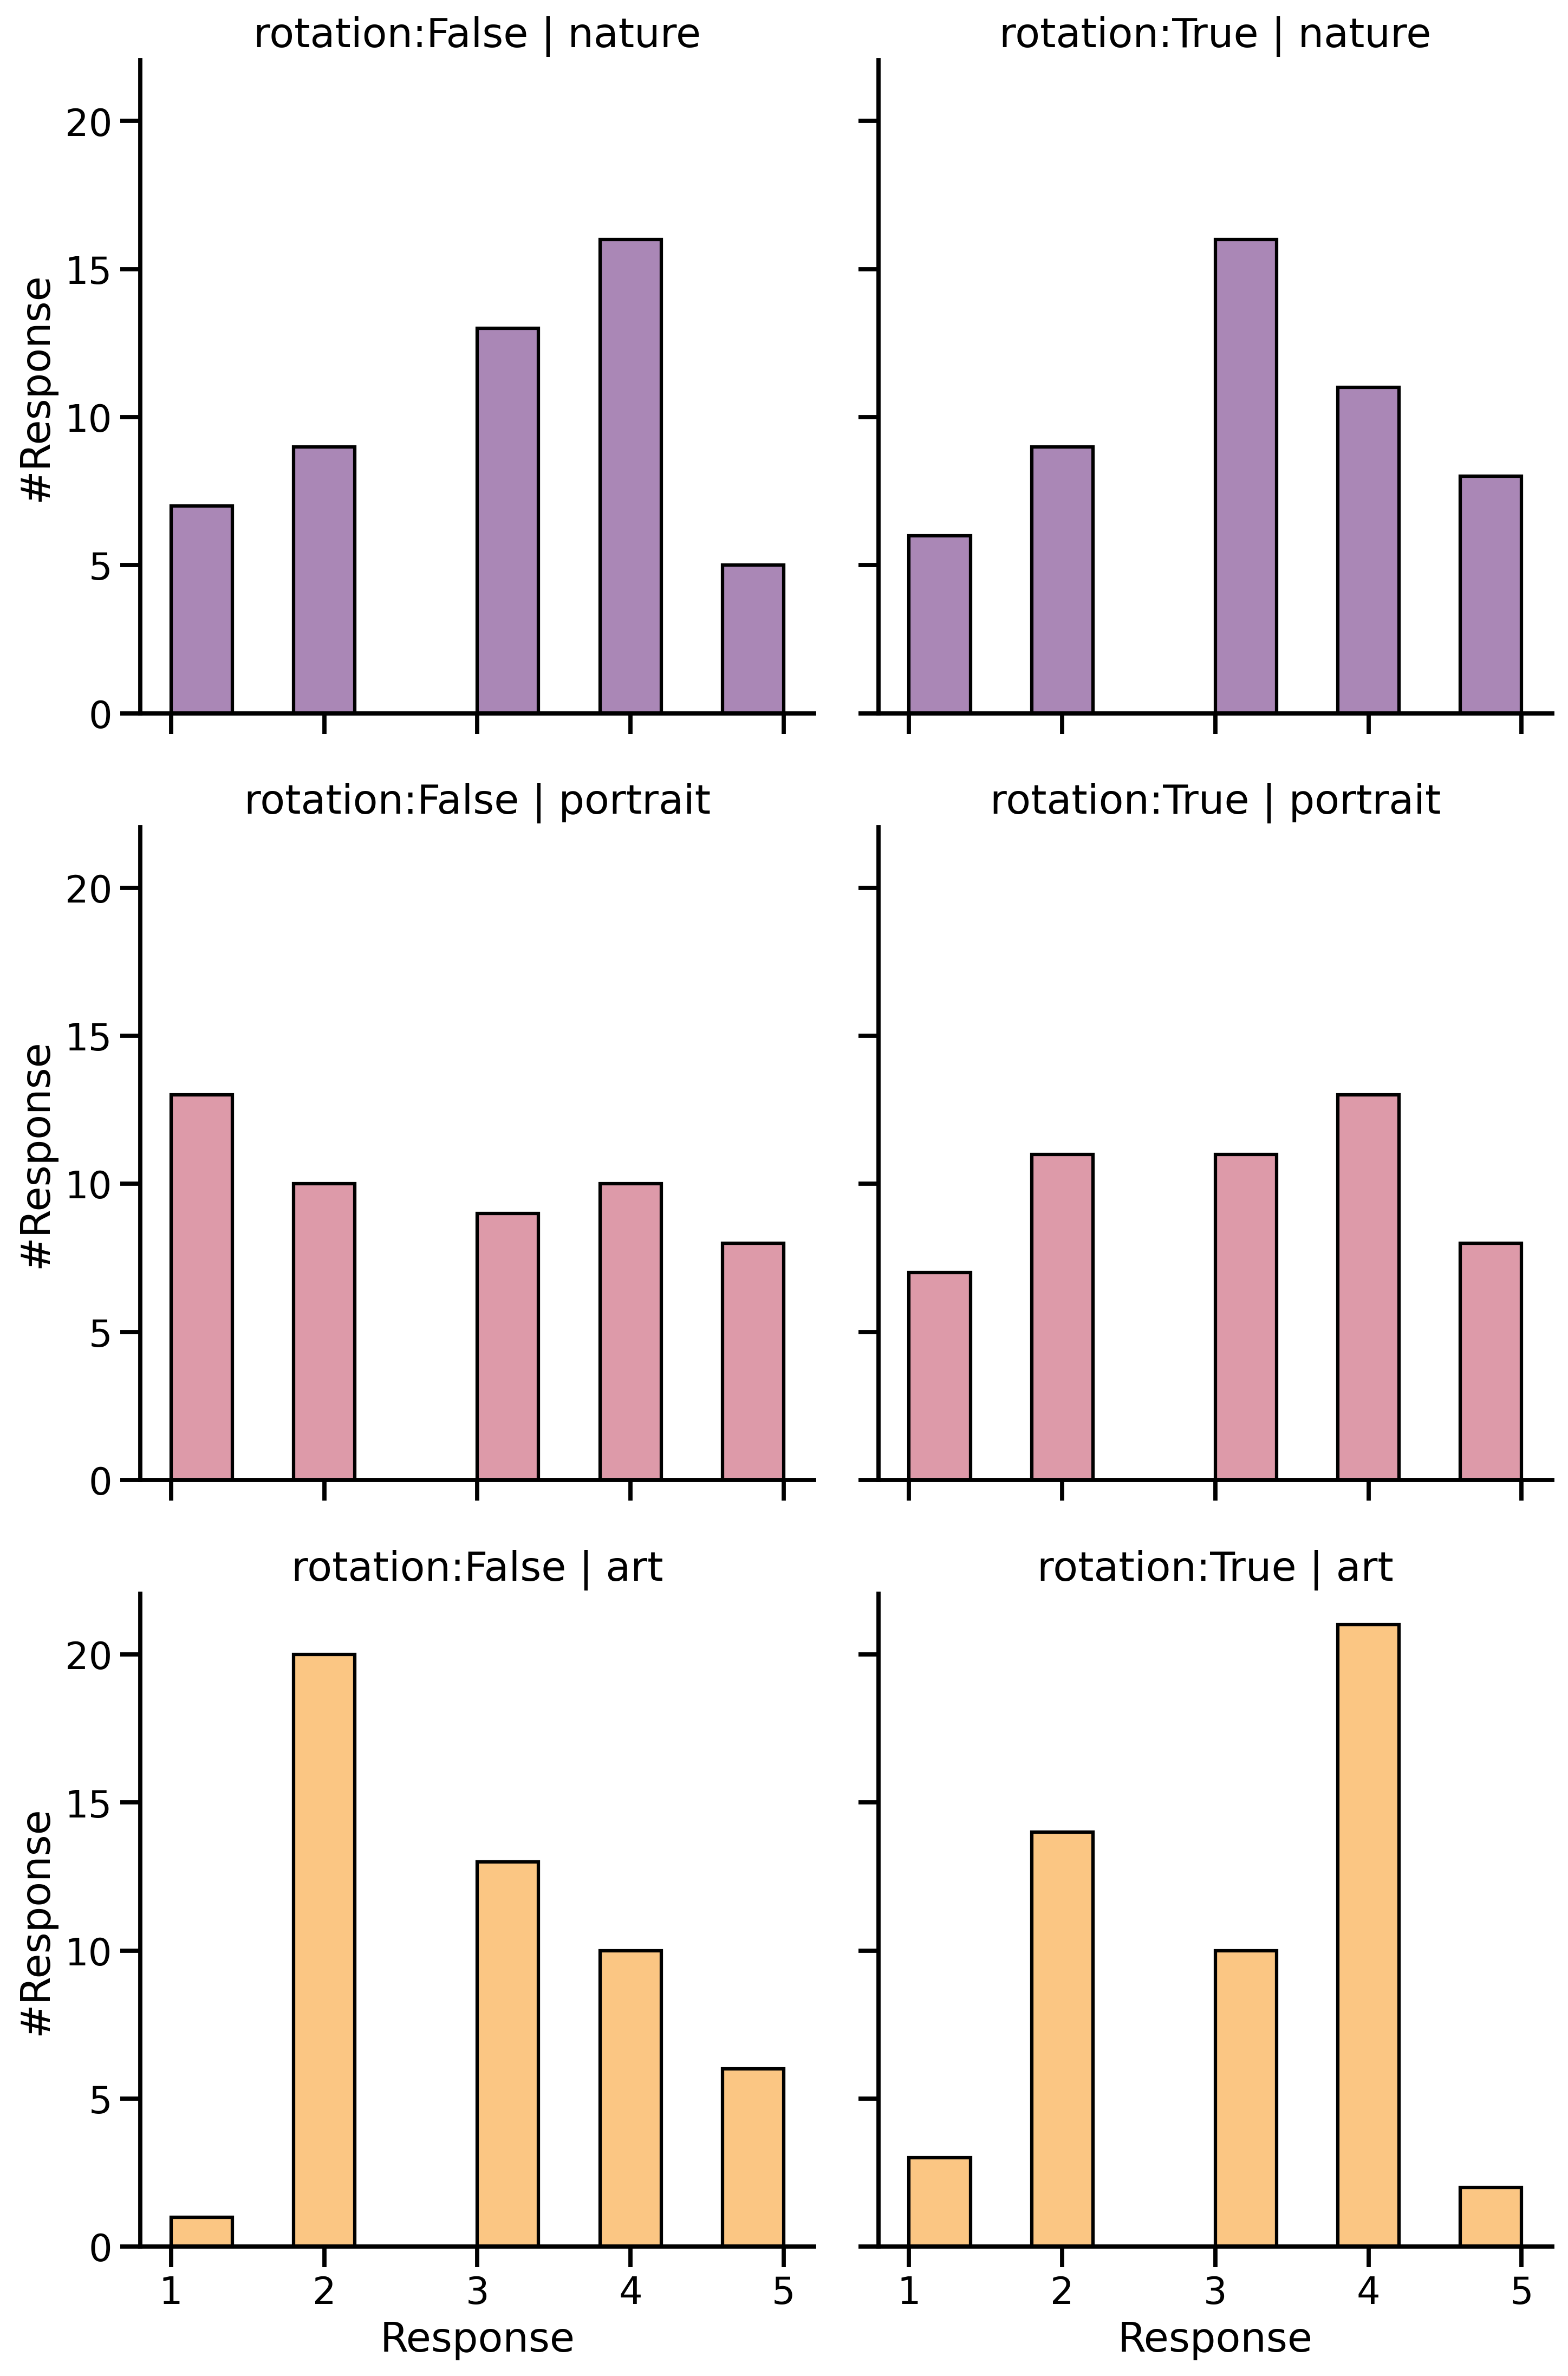

In [123]:
#distplot by category and rotation, alle probanden
g = sns.displot(x='response', data=df_witek, kind='hist', palette='inferno', col='rotation',
                hue="category", row='category', legend=False)
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
g.fig.set_dpi(300)
g.set_titles('rotation:{col_name} | {row_name}')
g.set_ylabels('#Response')
g.set_xlabels('Response')  

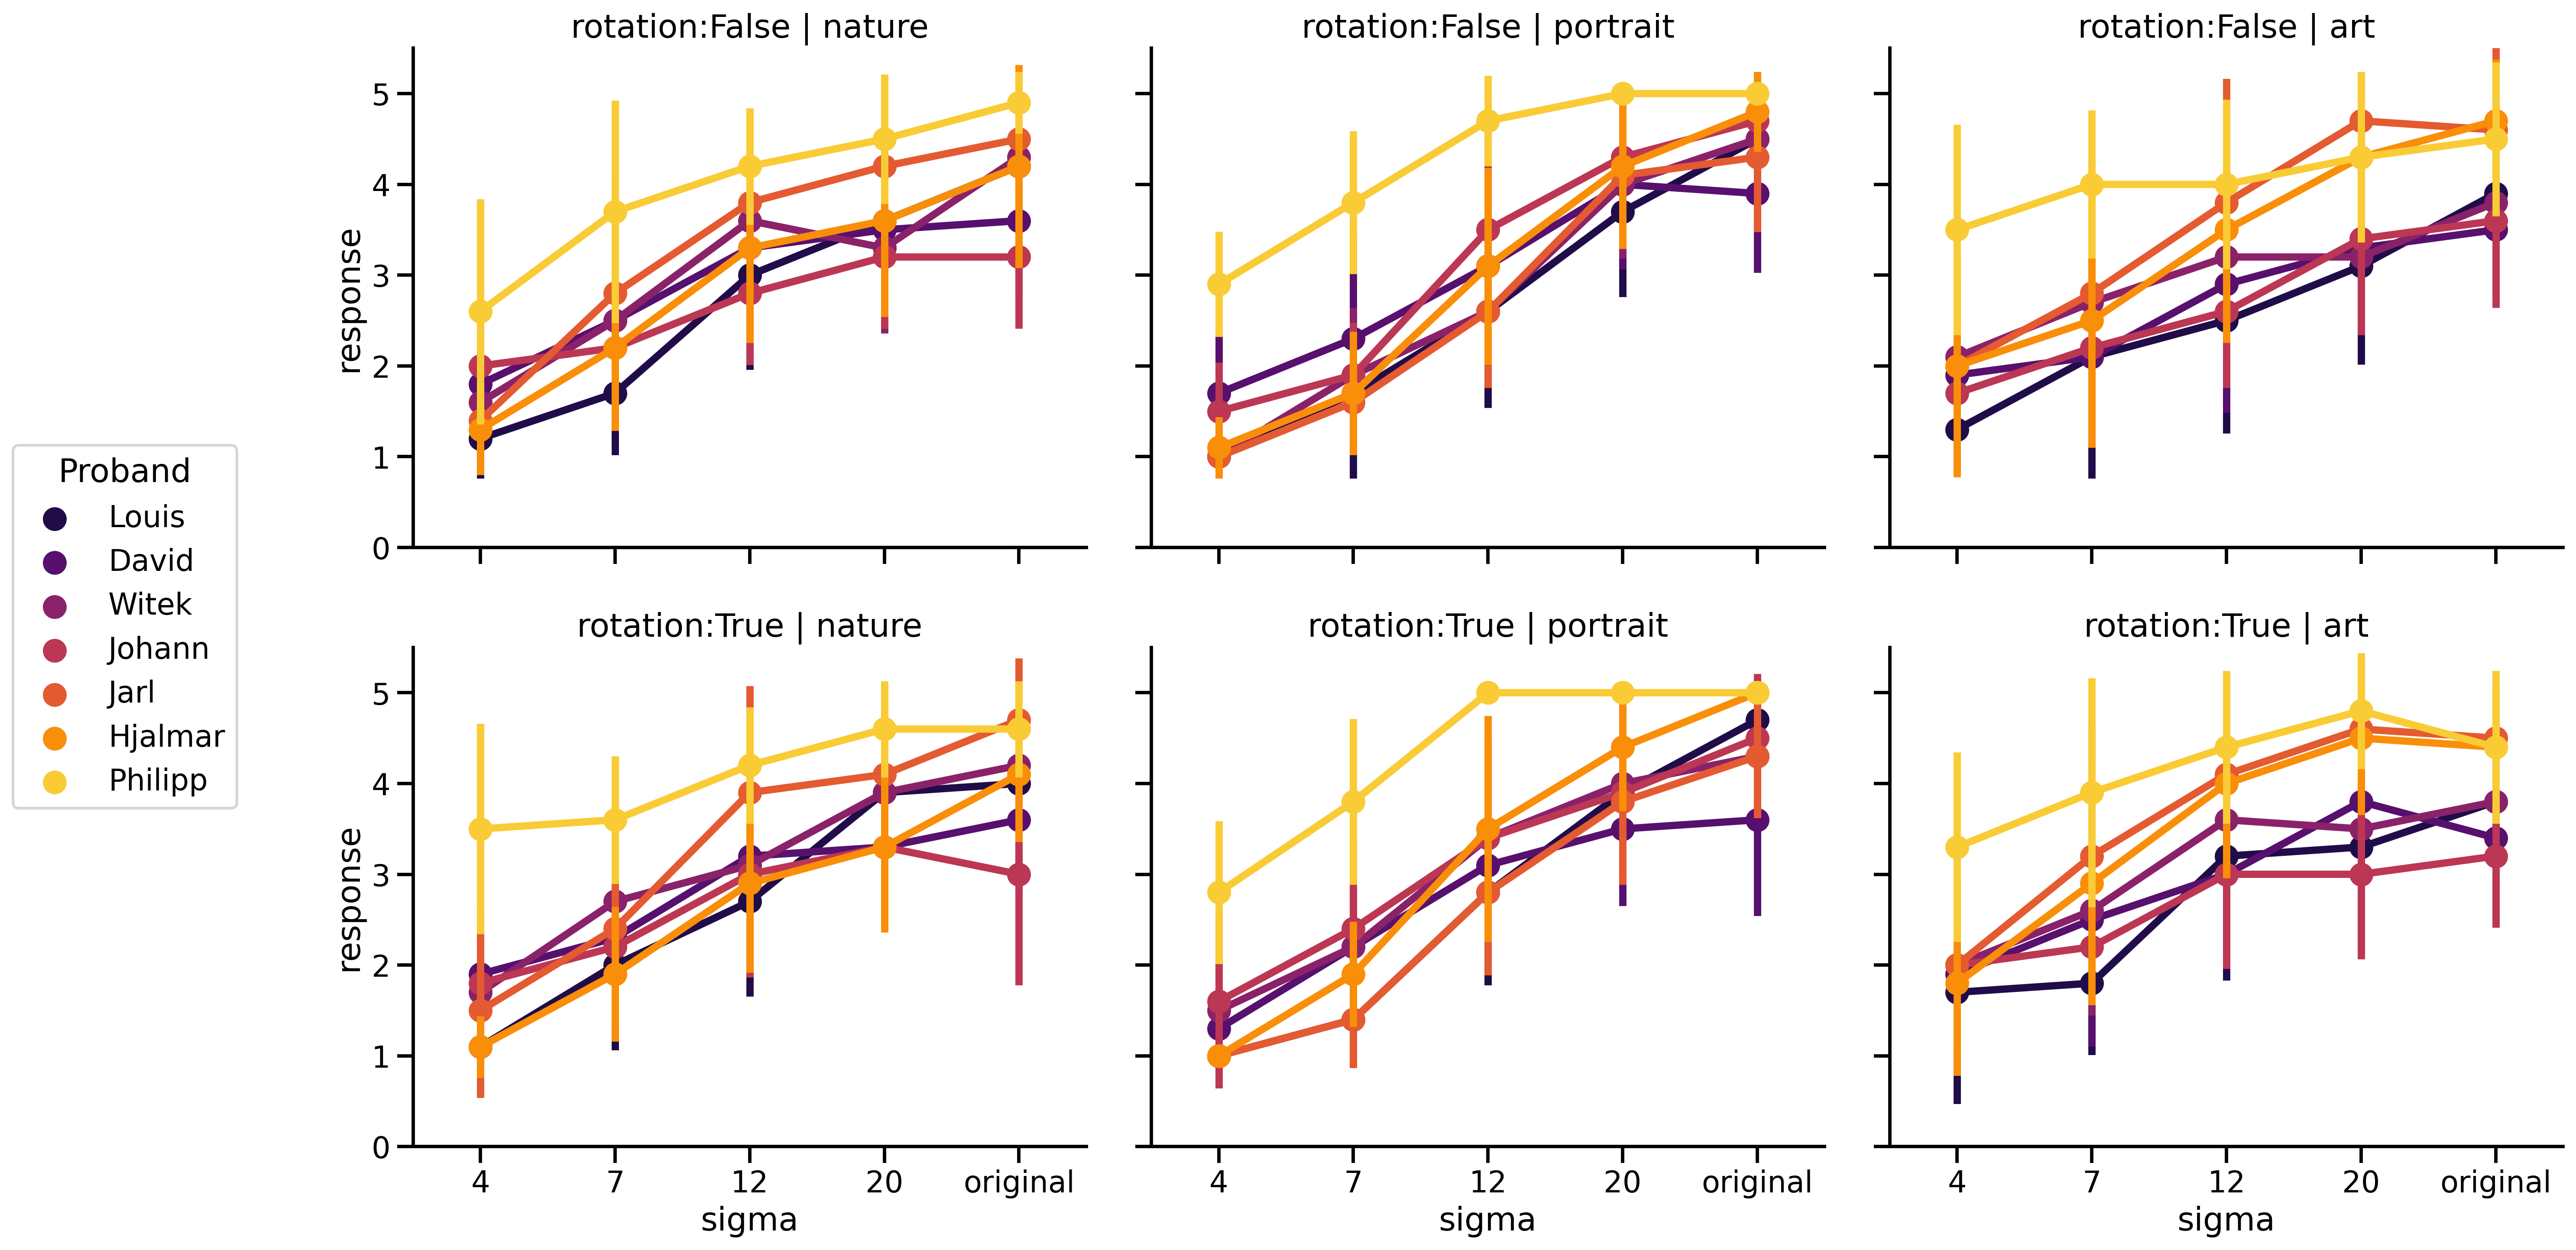

In [151]:
#catplot alle
g = sns.catplot(x='sigma', y='response', data=df, col ='category', row='rotation',
                kind='point', ci='sd',
                palette='inferno', hue='proband', estimator=np.mean)

g.set_titles('rotation:{row_name} | {col_name}')
g.fig.set_size_inches(20, 10)
plt.subplots_adjust(hspace=0.2)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))
g.set(yticks=np.arange(0,6,1))
sns.move_legend(g, "center left", bbox_to_anchor=(-0.1, 0.5), ncol=1, title='Proband', frameon=True)

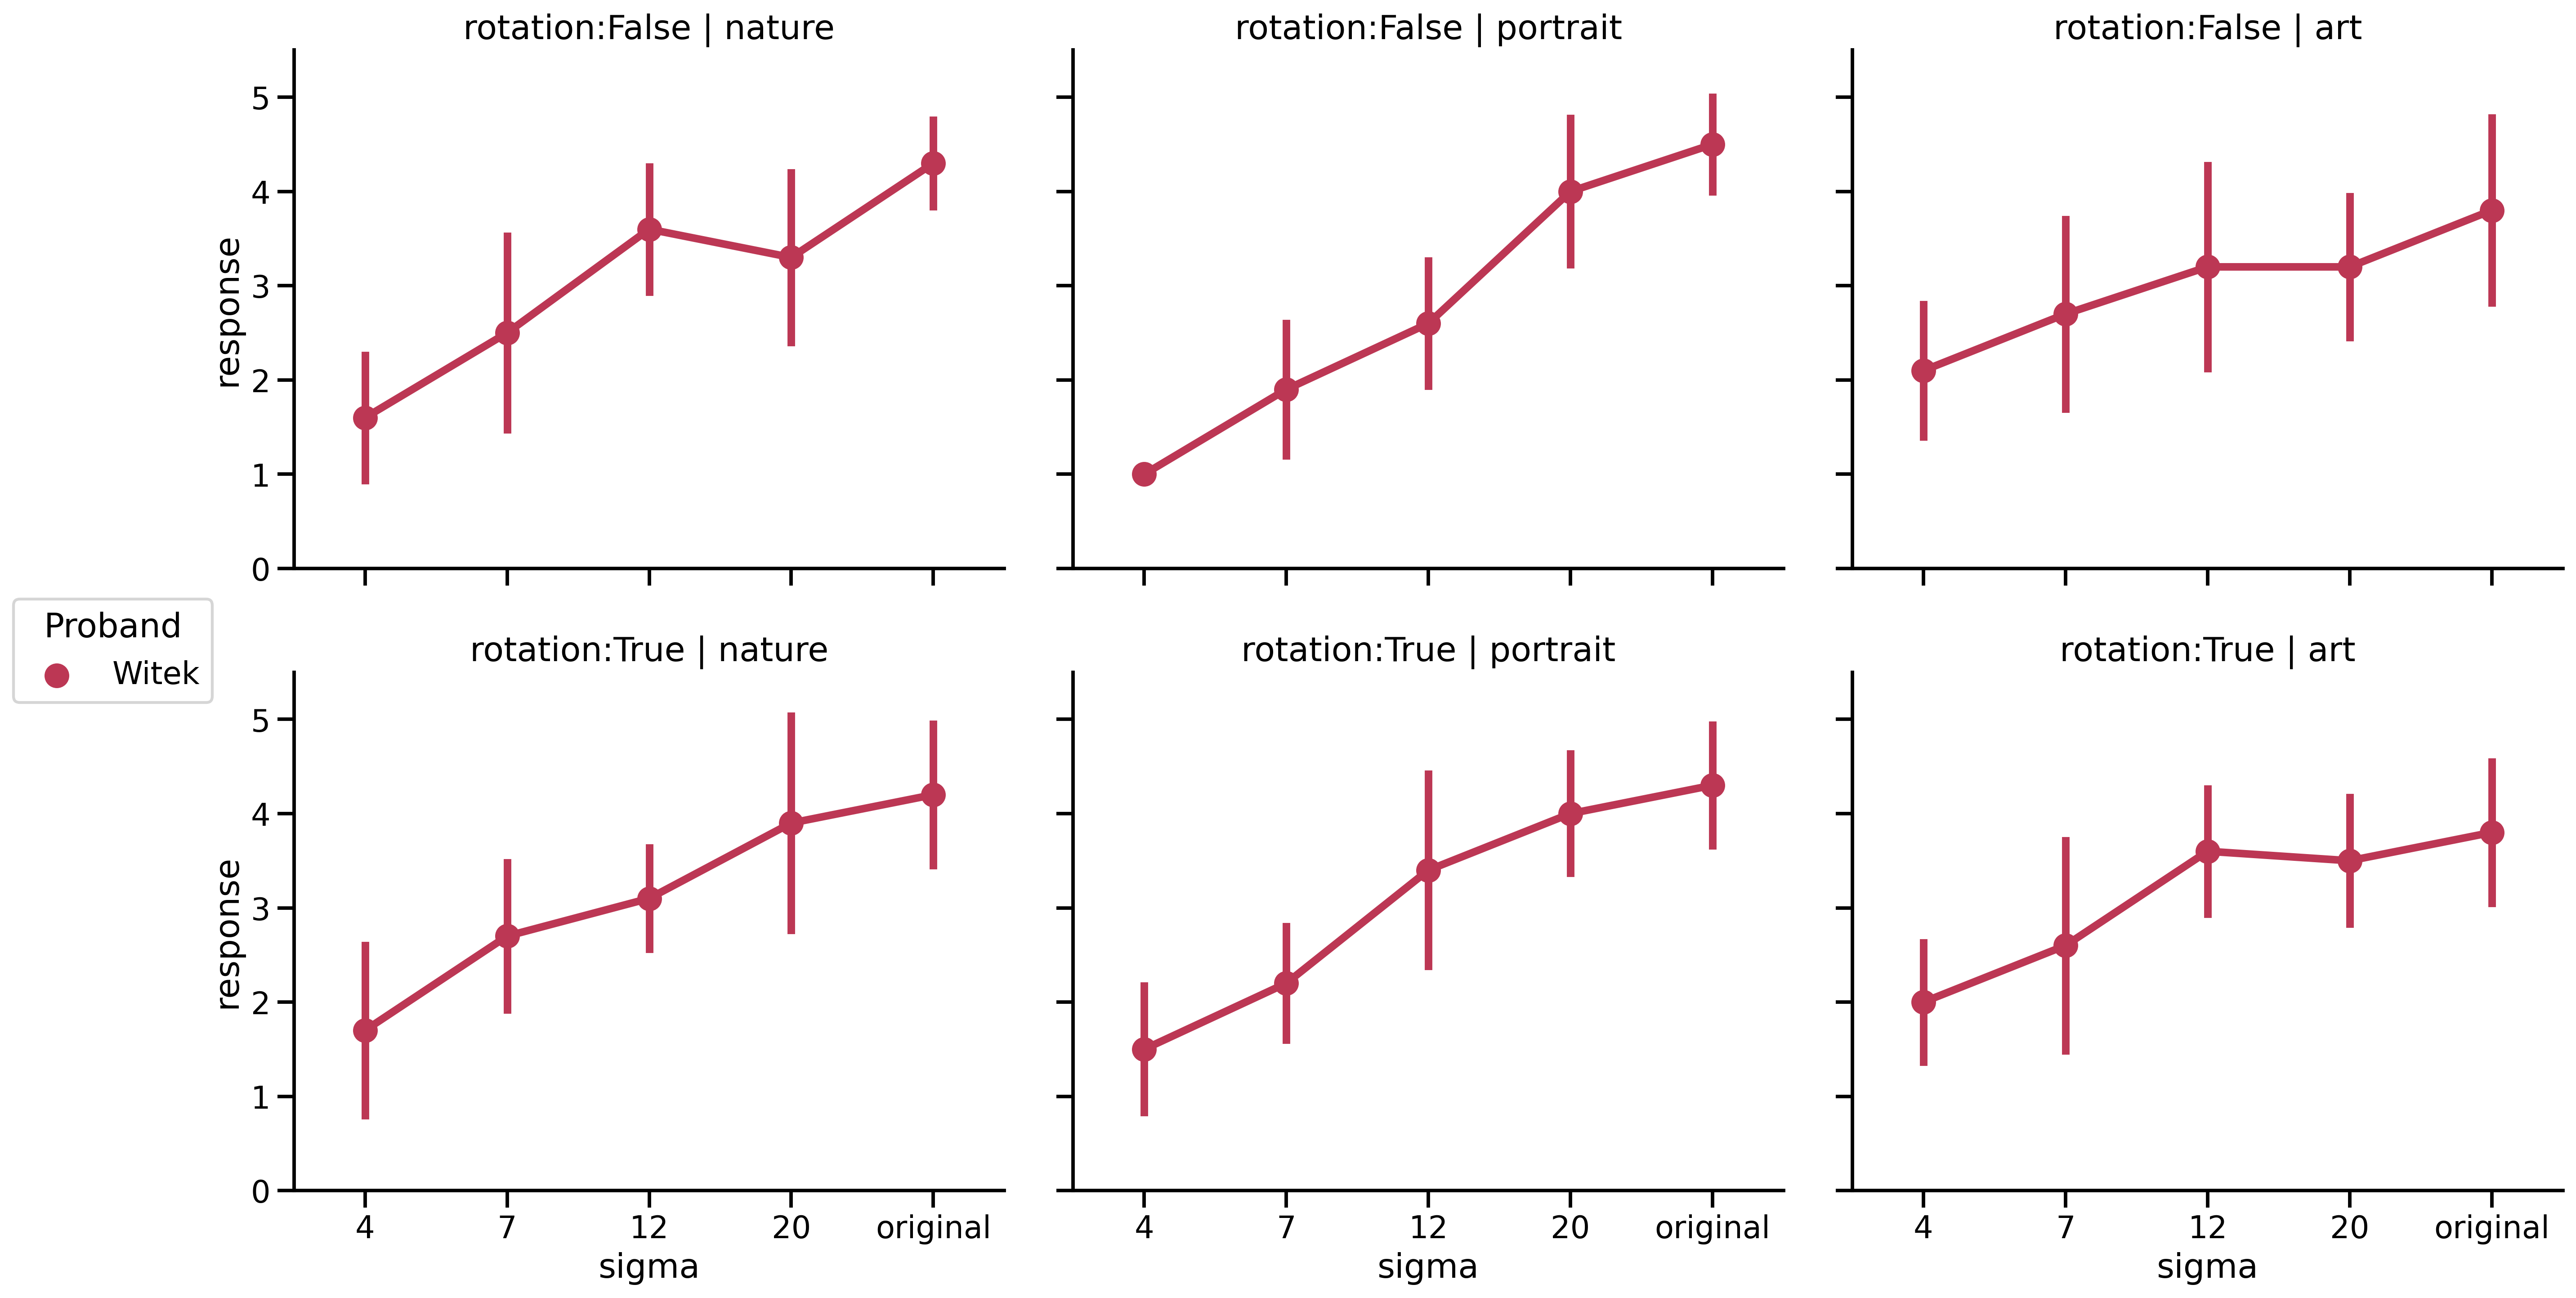

In [153]:
#catplot witek
g = sns.catplot(x='sigma', y='response', data=df_witek, col ='category', row='rotation',
                kind='point', ci='sd',
                palette='inferno', hue='proband', estimator=np.mean)

g.set_titles('rotation:{row_name} | {col_name}')
g.fig.set_size_inches(20, 10)
plt.subplots_adjust(hspace=0.2)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))
g.set(yticks=np.arange(0,6,1))
sns.move_legend(g, "center left", bbox_to_anchor=(-0.05, 0.5), ncol=1, title='Proband', frameon=True)